<a href="https://colab.research.google.com/github/rxy1998/MECE4520_dataset/blob/main/MECE4520_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction and background:**

---

The effect of birth order on personality has been speculated about since psychology as a science. The general idea is that children in different positions in the birth order will receive different treatment from their parents or have different experiences in the hierarchy of siblings. This is thought to lead to systematic personality differences in order of birth. Many common claims about this are false or exaggerated, and birth order has a small and narrow effect on human personality (Rohrer et al., 2015). This report will show the data analysis based on the questionnaire which includes 10 questions about personality extroversion level.

The following statements were rated on a five-point scale. The scale was labeled 1=Disagree, 3=Neutral, 5=Agree

EXT1 I am the life of the party.

EXT2 I don't talk a lot.

EXT3 I feel comfortable around people.

EXT4 I keep in the background.

EXT5 I start conversations.

EXT6 I have little to say.

EXT7 I talk to a lot of different people at parties.

EXT8 I don't like to draw attention to myself.

EXT9 I don't mind being the center of attention.

EXT10 I am quiet around strangers.

Other parameters:

Gender: 1=m, 2=f, 3=other

birthorder: the order of birth

birthnum: the number of the respondents’ parents have.

Age: age of the respondent


In [ ]:
%matplotlib notebook
from typing import List
from typing import Tuple
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

from tqdm import tqdm

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

## Reading data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/rxy1998/MECE4520_dataset/main/data2.csv")
data.head()

,EXT1 I am the life of the party.,EXT2 I talk a lot.,EXT3 I feel comfortable around people.,EXT4 I don't keep in the background.,EXT5 I start conversations.,EXT6 I have a lot to say.,EXT7 I talk to a lot of different people at parties.,EXT8 I don't like to draw attention to myself.,EXT9 I don't mind being the center of attention.,EXT10 I am noisy around strangers.,Unnamed: 10,Age,Gender,birthorder,birthnum,Extroversion,birthorderratio
0,3,1,3,2,2,2,3,1,2,1,NaN,30,2,2,2,2.0,1.000000
1,1,0,3,1,1,1,1,0,3,0,NaN,19,2,1,3,1.1,0.333333
2,3,1,3,1,2,2,2,0,1,0,NaN,21,2,1,2,1.5,0.500000
3,1,1,2,0,1,3,1,0,1,0,NaN,19,2,1,3,1.0,0.333333
4,4,3,3,2,3,3,4,1,4,0,NaN,37,2,1,3,2.7,0.333333


# **Methodology:**

---


To determine the influence of birth order to personality, a new parameter birthorderratio is defined to avoid the problem of different children number:

***birthoderratio=birthorder/birthnum***


**EDA**

Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

To visualize the data, EDA was used to get a rough idea of the distribution to assist further analysis. Figure1 shows that the extroversion level is normally distributed, also the rest of three figures shows the distribution of birth order, birth order ratio and the total children number.


## Exploratory Data Analysis (EDA)

In [ ]:
# distribution of the dependent variable
sns.histplot(x="birthorderratio", data=data)
plt.tight_layout()

<IPython.core.display.Javascript object>

**Regression analysis**

Regression analysis is a concept derived from statistics, it is a predictive modeling technique, which mainly studies the relationship between independent variables and dependent variables. Curves are usually used to fit data points, and then the distance difference between predicted line and data points is minimized.

Linear regression is a kind of regression analysis. From the simple linear regression, we found that the R and R2 are both tiny. Maybe there are so many factors that can influence the personality, and the beta of the birth order ratio is negative but small, which shows that first-borns do tend to be more outgoing, but the effect is pretty weak. Also from the multiple regression analysis, due to a smaller P value and larger beta, compared with other factors, birth order ratio does have a stronger influence on personality. 

## Simple linear regression

In [ ]:
y = data["Extroversion"]
x = data["birthorderratio"]

def simple_linear_regression(
    x: Union[List, np.ndarray, pd.Series], 
    y: Union[List, np.ndarray, pd.Series]) -> Tuple[float, float]:
    """Return the intercept and slope of a simple linear regression."""
    beta_1 = np.cov(x, y)[0][1] / np.cov(x, x)[0][1]
    beta_0 = np.mean(y) - beta_1 * np.mean(x)
    
    return beta_0, beta_1

beta_0, beta_1 = simple_linear_regression(x=x, y=y)

# calculate R^2
y_pred = beta_0 + beta_1 * x
SST = np.sum(np.square(y - np.mean(y)))
residual = y - y_pred
SSE = np.sum(np.square(residual))
r2 = 1 - SSE / SST
r = r2**0.5

print(f"beta_0 is: {beta_0:5.4f}")
print(f"beta_1 is: {beta_1:5.4f}")
print(f"R-square is: {r2:5.4f}")
print(f"R is: {r:5.4f}")

plt.figure()
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
sns.scatterplot(x="birthorderratio", y="Extroversion", data=data)
sns.lineplot(x=x_range, y=(beta_0 + beta_1 * x_range), color="red")
plt.tight_layout()

beta_0 is: 2.4731
beta_1 is: -0.0446
R-square is: 0.0002
R is: 0.0136


<IPython.core.display.Javascript object>

In [ ]:
# residual analysis
plt.figure()
sns.histplot(residual)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# accuracy of the coefficients
np.random.seed(42)
n_trials = 100

beta_0s, beta_1s = [], []
for _ in tqdm(range(n_trials)):
    sampling_proba = 0.2
    mask = np.random.choice([True, False], size=len(x), p=[sampling_proba, 1 - sampling_proba])
    x_sampled, y_sampled = x[mask], y[mask]
    beta_0, beta_1 = simple_linear_regression(x=x_sampled, y=y_sampled)
    beta_0s.append(beta_0)
    beta_1s.append(beta_1)

# plot the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
sns.histplot(beta_0s, ax=axes[0])
sns.histplot(beta_1s, ax=axes[1])
plt.tight_layout()

# plot the fited lines
plt.figure()
x_range = np.linspace(start=np.min(x), stop=np.max(x), num=100)
for i in tqdm(range(len(beta_0s))):
    sns.lineplot(x=x_range, y=(beta_0s[i] + beta_1s[i] * x_range), color="red", alpha=0.1)
sns.scatterplot(x="birthorderratio", y="Extroversion", data=data)
plt.tight_layout()

100%|██████████| 100/100 [00:00<00:00, 399.98it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 100/100 [00:02<00:00, 40.89it/s]


In [ ]:
# confidence intervals
SE_beta_0 = (np.var(residual, ddof=2) * (1. / len(x) + (np.mean(x))**2 / np.sum((x - np.mean(x))**2)))**0.5
SE_beta_1 = (np.var(residual) / np.sum((x - np.mean(x))**2))**0.5 

print(f"The standard error for beta_0 is: {SE_beta_0:5.4f}")
print(f"The standard error for beta_1 is: {SE_beta_1:5.4f}")

The standard error for beta_0 is: 0.0124
The standard error for beta_1 is: 0.0164


In [ ]:
# simple linear regression with the `statsmodels` library
model_1 = smf.ols(formula='Extroversion ~ birthorder', data=data)
result_1 = model_1.fit()
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:           Extroversion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8262
Date:                Tue, 14 Dec 2021   Prob (F-statistic):              0.363
Time:                        21:50:25   Log-Likelihood:                -53895.
No. Observations:               40318   AIC:                         1.078e+05
Df Residuals:                   40316   BIC:                         1.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4351      0.009    284.057      0.0

In [ ]:
# linear regress in matrix format
X = np.hstack(
    (np.ones(shape=(len(x), 1)), 
     x.to_numpy().reshape(-1, 1)))

# point estimate
beta_matrix = np.linalg.inv(X.T @ X) @ X.T @ y
print("The estimates for beta are:")
print(beta_matrix)

# variance
se_matrix = np.sqrt(np.var(residual, ddof=2) * np.linalg.inv(X.T @ X))
print("\nThe standard error for beta are:")
print(se_matrix)

The estimates for beta are:
[ 2.47307028 -0.04461879]

The standard error for beta are:
[[0.01240338        nan]
 [       nan 0.01639016]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


## Multi-variant linear regression

In [ ]:
model_2 = smf.ols(formula='Extroversion ~ birthorder + birthnum + Age + Gender', data=data)
result_2 = model_2.fit()
print(result_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Extroversion   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     60.02
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.26e-50
Time:                        21:50:25   Log-Likelihood:                -53775.
No. Observations:               40318   AIC:                         1.076e+05
Df Residuals:                   40313   BIC:                         1.076e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1874      0.020    109.696      0.0

In [ ]:
# one-hot encode the categorical variables
model_3 = smf.ols(formula='Extroversion ~ birthorderratio ', data=data)
result_3 = model_3.fit()
print(result_3.summary())

                            OLS Regression Results                            
Dep. Variable:           Extroversion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.411
Date:                Tue, 14 Dec 2021   Prob (F-statistic):            0.00649
Time:                        21:50:25   Log-Likelihood:                -53891.
No. Observations:               40318   AIC:                         1.078e+05
Df Residuals:                   40316   BIC:                         1.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.4731      0.012    1

# Classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option("display.max_columns", 500)
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

For classification, the main method we took is Logistic Regression. First we defined a reference as extroversion level after processing the data. We labeled the extroversion level that the value below 2.5 is 0 (which means the personality is introverted), and value above 2.5 is 1 (which means the personality belongs to extroverted).

In [ ]:
personality_data = pd.read_csv("https://raw.githubusercontent.com/Congcong1027/MECE4520_DATASCIENCE/main/data22.csv")
personality_data["Ext"] = personality_data["Extroversion"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,birthorder,birthnum,birthorderratio,Extroversion,Ext
0,3,1,3,2,2,2,3,1,2,1,2,2,1.0,2.0,0
1,1,0,2,0,1,0,1,0,1,0,2,2,1.0,0.6,0
2,3,4,5,2,4,4,4,1,1,2,3,3,1.0,3.0,1
3,3,2,3,2,3,2,3,2,3,2,2,2,1.0,2.5,1
4,4,4,4,4,5,4,5,3,4,4,2,2,1.0,4.1,1


 Then the traditional regression framework shows that it is not appropriate for these data to show the relationship between personality and birth-order ratio anymore.

In [ ]:
sns.scatterplot(x="birthorderratio", y="Ext", data=personality_data)
plt.tight_layout()

In [ ]:
sns.scatterplot(x="birthorder", y="Ext", data=personality_data)
plt.tight_layout()

 Therefore, we used logistic regression and got the according result. 

### Logistic Regression

**EXT v.s. birth order ratio**

In [ ]:
model = smf.glm(
    formula='Ext ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Ext   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27940.
Date:                Tue, 14 Dec 2021   Deviance:                       55879.
Time:                        22:02:41   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0045      0.027     

The summary shows the relevance between birth-order ratio and personality. From the result, we should focus on the p-value to determine the degree of correlation between these two parameters. And the p-value in the form is 0.130, and it’s larger compared with 0.05, a value we usually used as a reference to decide if the model fits to these data. Hence, we concluded that this logistic regression model is invalid for analyzing the relationship between birth-order ratio and personality. Except for using p-value, we can also acquire the same conclusion from the confidence interval that 0 is included between [-0.124 0.016].

To testify if the data processing is or not reasonable enough, we focused on the raw data instead of extroversion level. We studied the answer to the ten questions under the “EXT” domain and their relevance to the birth-order ratio. Similarly, we labeled that the value below 2.5 is 0, and the value above 2.5 is 1 to get a more specific feature. By using logistic regression, we analyzed the ten results form the summary. 

In [ ]:
personality_data["EXT11"] = personality_data["EXT1"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT21"] = personality_data["EXT2"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT31"] = personality_data["EXT3"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT41"] = personality_data["EXT4"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT51"] = personality_data["EXT5"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT61"] = personality_data["EXT6"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT71"] = personality_data["EXT7"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT81"] = personality_data["EXT8"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT91"] = personality_data["EXT9"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data["EXT101"] = personality_data["EXT10"].apply(lambda x: 0 if x < 2.5 else 1)
personality_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,birthorder,birthnum,birthorderratio,Extroversion,Ext,EXT11,EXT21,EXT31,EXT41,EXT51,EXT61,EXT71,EXT81,EXT91,EXT101
0,3,1,3,2,2,2,3,1,2,1,2,2,1.0,2.0,0,1,0,1,0,0,0,1,0,0,0
1,1,0,2,0,1,0,1,0,1,0,2,2,1.0,0.6,0,0,0,0,0,0,0,0,0,0,0
2,3,4,5,2,4,4,4,1,1,2,3,3,1.0,3.0,1,1,1,1,0,1,1,1,0,0,0
3,3,2,3,2,3,2,3,2,3,2,2,2,1.0,2.5,1,1,0,1,0,1,0,1,0,1,0
4,4,4,4,4,5,4,5,3,4,4,2,2,1.0,4.1,1,1,1,1,1,1,1,1,1,1,1


**EXT1 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT11 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT11   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27884.
Date:                Tue, 14 Dec 2021   Deviance:                       55769.
Time:                        22:02:41   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1170      0.027     

**EXT2 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT21 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT21   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27762.
Date:                Tue, 14 Dec 2021   Deviance:                       55524.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.1447      0.027     

**EXT3 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT31 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT31   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24468.
Date:                Tue, 14 Dec 2021   Deviance:                       48936.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9411      0.030     

**EXT4 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT41 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT41   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24846.
Date:                Tue, 14 Dec 2021   Deviance:                       49692.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7744      0.029    -

**EXT5 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT51 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT51   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24344.
Date:                Tue, 14 Dec 2021   Deviance:                       48687.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9456      0.030     

**EXT6 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT61 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT61   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26468.
Date:                Tue, 14 Dec 2021   Deviance:                       52935.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6380      0.028     

**EXT7 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT71 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT71   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27929.
Date:                Tue, 14 Dec 2021   Deviance:                       55858.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1191      0.027     

**EXT8 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT81 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT81   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -22879.
Date:                Tue, 14 Dec 2021   Deviance:                       45759.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1078      0.031    -

**EXT9 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT91 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  EXT91   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27353.
Date:                Tue, 14 Dec 2021   Deviance:                       54707.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.3313      0.027     

**EXT10 v.s. birthorderratio**

In [ ]:
model = smf.glm(
    formula='EXT101 ~ birthorderratio', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 EXT101   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21845.
Date:                Tue, 14 Dec 2021   Deviance:                       43690.
Time:                        22:02:42   Pearson chi2:                 4.03e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1542      0.032    -

But still, we cannot see there exists a feasible connection between those ten questions, because all the final outcome from those ten different questions indicates that the p-value of most of them are larger than 0.05. Thus, the same situation can be classified as a common conclusion generally, which is the logistic regression cannot set up a valid model for finding the link between personality and birth-order ratio.

To consider in a more comprehensive way, we speculated that if there is chance that the birth-order ratio itself is not specific enough to reach a conclusion. From the perspective of some daily life experience, we started to think about whether one’s character is related to if the child is the eldest or youngest child in their family. With this idea, we picked the youngest children at their home whose birth order ratio is 1, and the oldest children whose birth order is 1, respectively, and their personality (i.e.the extroversion level). 

In [ ]:
personality_data["Youngest"] = personality_data["birthorderratio"].apply(lambda x: 0 if x != 1 else 1)
personality_data["Oldest"] = personality_data["birthorder"].apply(lambda x: 0 if x != 1 else 1)
personality_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,birthorder,birthnum,birthorderratio,Extroversion,Ext,EXT11,EXT21,EXT31,EXT41,EXT51,EXT61,EXT71,EXT81,EXT91,EXT101,Youngest,Oldest
0,3,1,3,2,2,2,3,1,2,1,2,2,1.0,2.0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,1,0,2,0,1,0,1,0,1,0,2,2,1.0,0.6,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,4,5,2,4,4,4,1,1,2,3,3,1.0,3.0,1,1,1,1,0,1,1,1,0,0,0,1,0
3,3,2,3,2,3,2,3,2,3,2,2,2,1.0,2.5,1,1,0,1,0,1,0,1,0,1,0,1,0
4,4,4,4,4,5,4,5,3,4,4,2,2,1.0,4.1,1,1,1,1,1,1,1,1,1,1,1,1,0


**EXT v.s. oldest**

In [ ]:
model = smf.glm(
    formula='Ext ~ Oldest', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Ext   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27940.
Date:                Tue, 14 Dec 2021   Deviance:                       55881.
Time:                        22:02:43   Pearson chi2:                 4.03e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0255      0.014     -1.812      0.0

**EXT v.s. Youngest**

In [ ]:
model = smf.glm(
    formula='Ext ~ Youngest', 
    data=personality_data,
    family=sm.families.Binomial(),
)
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    Ext   No. Observations:                40318
Model:                            GLM   Df Residuals:                    40316
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27940.
Date:                Tue, 14 Dec 2021   Deviance:                       55879.
Time:                        22:02:43   Pearson chi2:                 4.03e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0209      0.013     -1.599      0.1

Unsurprisingly, the logistic regression result for both orders reveal that the p-value is 0.420 and 0.142, both of them are greater than 0.05. Thus, from logistic regression, we cannot see the correlation between birth-order and personality.

For the given dataset, there are three features which may affect personality, but we do not know which feature would exert the most influence on it. Here, we carried out PCA to compress the dataset so that we reduce the dimension of features and speed up training.

# PCA

In [ ]:
# scale the input
X = data[["birthorder","birthnum","birthorderratio"]].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.12832792, -0.55260672,  1.06085185],
       [-0.72517343,  0.12513246, -1.32126864],
       [-0.72517343, -0.55260672, -0.72573852],
       ...,
       [ 0.12832792,  0.12513246, -0.1302084 ],
       [-0.72517343, -0.55260672, -0.72573852],
       [ 0.12832792,  0.12513246, -0.1302084 ]])

In [ ]:
# scale the input
X = data[["birthorder","birthnum","birthorderratio"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.12832792, -0.55260672,  1.06085185],
       [-0.72517343,  0.12513246, -1.32126864],
       [-0.72517343, -0.55260672, -0.72573852],
       ...,
       [ 0.12832792,  0.12513246, -0.1302084 ],
       [-0.72517343, -0.55260672, -0.72573852],
       [ 0.12832792,  0.12513246, -0.1302084 ]])

Then, we performed SVD on the normalized martix X. After that, we selected the first column of the obtained U matrix as the first principal. Reconstruct the data by multiplying the normalized martix with first principal so that we compressed the three dimensional dataset into one dimensional. Also, we obtained the reconstruction error as follows.

In [ ]:
# perform SVD
n = len(X_scaled)
U, S, Vh = np.linalg.svd(X_scaled.T @ X_scaled / n)
k = 1
U_reduced = U[:,:k];
Z = X_scaled @ U_reduced;
Z



array([[ 0.02659779],
       [ 0.74394361],
       [ 1.04308482],
       ...,
       [-0.14732381],
       [ 1.04308482],
       [-0.14732381]])

In [ ]:
# calculate reconstruction error
all_errors = []
for k in range(1, len(U) + 1):
    U_reduced = U[:, :k]
    Z = X_scaled @ U_reduced
    X_approx = Z @ U_reduced.T
    error = (
        np.sum(np.square(np.linalg.norm((X_scaled - X_approx), ord=2, axis=1))) 
        / np.sum(np.square(np.linalg.norm(X_scaled, ord=2, axis=1)))
    )
    all_errors.append(error)

all_errors

[0.4501278113180226, 0.02057143518028306, 6.76248180504366e-32]

In [ ]:
for i in range(len(S)):
    print(1 - np.sum(S[:(i + 1)])/ np.sum(S))

0.45012781131802226
0.020571435180282704
0.0


# K-means

## load file
## K-means clustering
2 cluster center printed.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/LepingWang/MECE4520-report/main/data.csv"
data =np.genfromtxt (url, delimiter=",")
print(data.shape)
csv = data[1:]
print(csv.shape)
X = csv[:,:10]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_.shape)
order = csv[:,10]
cluster = kmeans.labels_
print(np.where(cluster==0)[0].shape)
print(np.where(cluster==1)[0].shape)
c0 = X[np.where(cluster==0)]
c1 =X[np.where(cluster==1)]
print(kmeans.cluster_centers_)
all_mean = []
c0_mean = []
c1_mean = []
h,w = X.shape
for each in range(w):
    column = X[:,each]
    col0 = c0[:,each]
    col2 = c1[:,each]
    all_mean.append(np.mean(column))
    c0_mean.append(np.mean(col0))
    c1_mean.append(np.mean(col2))

(40393, 14)
(40392, 14)
(40392,)
(20731,)
(19661,)
[[1.83816145 1.44640788 2.54272885 1.05455774 2.47122441 2.09076864
  1.80402665 0.91483198 2.18081306 0.61901313]
 [3.39537602 3.06438008 3.96077236 2.6089939  4.10934959 3.26808943
  3.69273374 2.21829268 3.72652439 2.21941057]]


Plot the mean of the answer of the 10 questions for 2 cluster and sample. Therefore ,validation of K-means clustering and extroversion meansurement is complete.

In [ ]:
red = []
blue=[]
for each in range(1,11):
    low = [[each,each],[0,2.5]]
    up = [[each,each],[2.5,5]]
    if each%2 == 1:
        red.append(up)
        blue.append(low)
    else:
        red.append(low)
        blue.append(up)
print(red,"\n",blue)

label_list=[]
for each in range(1,11):
    label_list.append(f"EXT{each}")

[[[1, 1], [2.5, 5]], [[2, 2], [0, 2.5]], [[3, 3], [2.5, 5]], [[4, 4], [0, 2.5]], [[5, 5], [2.5, 5]], [[6, 6], [0, 2.5]], [[7, 7], [2.5, 5]], [[8, 8], [0, 2.5]], [[9, 9], [2.5, 5]], [[10, 10], [0, 2.5]]] 
 [[[1, 1], [0, 2.5]], [[2, 2], [2.5, 5]], [[3, 3], [0, 2.5]], [[4, 4], [2.5, 5]], [[5, 5], [0, 2.5]], [[6, 6], [2.5, 5]], [[7, 7], [0, 2.5]], [[8, 8], [2.5, 5]], [[9, 9], [0, 2.5]], [[10, 10], [2.5, 5]]]


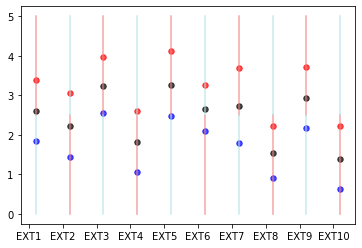

In [ ]:

for each in red:
    plt.plot(each[0],each[1],alpha=0.7,color="lightcoral")
for each in blue:
    plt.plot(each[0],each[1],alpha=0.7,color="powderblue")
certer0 = kmeans.cluster_centers_[0]
certer1 =  kmeans.cluster_centers_[1]
for i in range(len(certer0)):
    #plt.scatter(i+1,certer0[i],c="navy",s=20,alpha=0.5)
    #plt.scatter(i+1,certer1[i],c="maroon",s=20,alpha=0.5)
    plt.scatter(i+1,all_mean[i],c="black",s=30,alpha=0.7)
    plt.scatter(i+1,c0_mean[i],c="blue",s=30,alpha=0.7)
    plt.scatter(i+1,c1_mean[i],c="red",s=30,alpha=0.7)
plt.xticks([index - 0.2 for index in range(1,11)], label_list)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


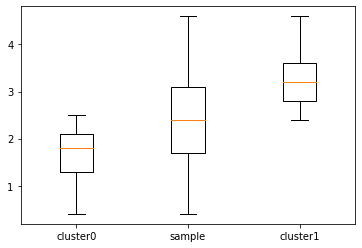

In [ ]:
ex0=csv[:,11]
ex0 = ex0[np.where(cluster==0)]
ex1=csv[:,11]
ex1 = ex1[np.where(cluster==1)]
plt.boxplot([ex0,csv[:,11],ex1],labels=["cluster0","sample","cluster1"])
plt.show()

In [ ]:
# birth order category
first_born=[]
middle_born=[]
last_born=[]
only_child=[]
h,w = csv.shape
for r in range(h):
    if csv[r][10]==1. and csv[r][12]>1:
        first_born.append(1)
    else:
        first_born.append(0)
    if csv[r][10]>1. and csv[r][12]>csv[r][10]:
        middle_born.append(1)
    else:
        middle_born.append(0)
    if csv[r][10]== csv[r][12] and csv[r][12]>1.:
        last_born.append(1)
    else:
        last_born.append(0)
    if csv[r][12]==1.:
        only_child.append(1)
    else:
        only_child.append(0)
first_born = np.array(first_born)
middle_born = np.array(middle_born)
last_born = np.array(last_born)
only_child = np.array(only_child)

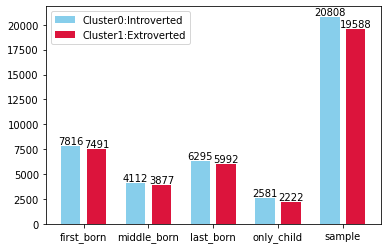

In [ ]:
bar_height=[[7816, 7491],
 [4112, 3877],
 [6295, 5992],
 [2581, 2222],
 [20808,19588]          ]
bar_height=np.array(bar_height)
bar_label=["first_born",
"middle_born",
"last_born",
"only_child","sample"]

barwidth=0.3
rect1=plt.bar(np.arange(5),bar_height[:,0],color="skyblue",width=barwidth,label="Cluster0:Introverted")
rect2=plt.bar(np.arange(5)+0.4,bar_height[:,1],color="crimson",width=barwidth,label="Cluster1:Extroverted")
for rect in rect1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")
for rect in rect2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, str(height), ha="center", va="bottom")

plt.xticks(np.arange(5)+0.2,bar_label)
plt.legend()
plt.show()

# Conclusion
## No Significant correlation
As the barplot above demonstrates, there are almost idential portion of extroverts and introverts in each category of people.So we can conclude that there are no significant correlations between birth order and personality.

# Future work
## Take more attributes into consideration
As we all know, people change during time and social status with their age growing. Current dataset does not include participants' age,gender ,religious belief and nationality. We might assume that the reason why we cannot draw the correlations between peronality with birth order is the lack of population diversity. There are obviously different living styles in a Catholic family and a Hipster family.So in the future, we need to enrich the dataset to take more attributes into consideration.